Búsqueda exhaustiva
===

* 30:00 min | Última modificación: Mayo 21, 2021 | [YouTube]

La búsqueda exhaustiva es una metodología de fuerza bruta que evalua todas las soluciones posibles para encontrar el mínimo de la función objetivo. En el caso de funciones con valores reales, se puede construir una malla fina n-dimensional y se evalua la función objetivo para cada punto

## Definición del problema

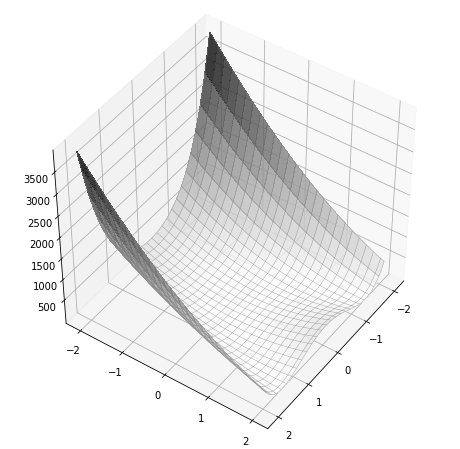

In [1]:
#
# Para ejemplificar su uso, buscará el punto de mínima de
# la función de Rosenbrock de dos dimensiones. El punto de
# mínima es f(1, 1) = 0. La región de búsqueda es
#
#    -2.048 < x, y < 2.048
#
# A continuación se gráfica la función y su contorno para
# el caso de 2 dimensiones.
#
from EOS.benchmarks import Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

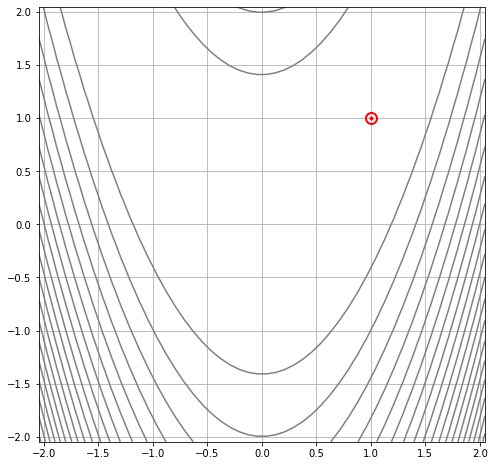

In [2]:
#
# El punto rojo indica el mínimo de la función
#
fn.plot_contour()

## Búsqueda exhaustiva

In [4]:
import numpy as np

#
# Este método consiste en generar una malla de puntos.
# El punto de mínima corresponde al menor valor
# encontrado dentro de la malla.
#

# número de puntos de la malla
n_points = 50

# Se genera la malla de puntos en 2D
X = np.linspace(start=fn.LB[0], stop=fn.UB[0], num=n_points)
Y = np.linspace(start=fn.LB[1], stop=fn.UB[1], num=n_points)
X, Y = np.meshgrid(X, Y)

# Se evalua la función objetivo en cada punto de la malla
Z = np.array([(x, y, fn(np.array([x, y]))) for x, y in zip(X.ravel(), Y.ravel())])

# Se ordena la lista por el valor de la función objetivo 
# para obtener el punto de mínima
from operator import itemgetter

Z = sorted(Z, key=itemgetter(2))

# El punto de mínima encontrado y cantidad de puntos evaluados
Z[0], len(Z)

(array([0.79412245, 0.62693878, 0.04374842]), 2500)

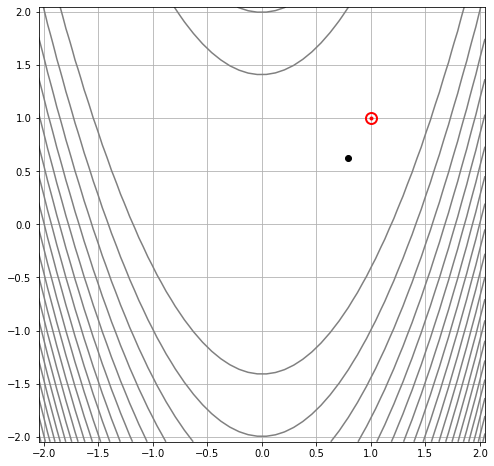

In [5]:
#
# Comparación del punto encontrado y el mínimo real de la
# función
#
import matplotlib.pyplot as plt

fn.plot_contour()

plt.gca().plot(
    Z[0][0],
    Z[0][1],
    "o",
    c="k",
)

plt.show()

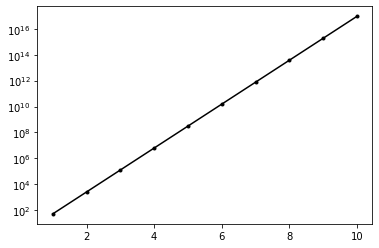

In [6]:
#
# Este método no es viable cuando aumenta la cantidad de
# dimensiones de la función a minimizar.
#
#    puntos_a_evaluar = n_points ** n_dims
#
# El crecimiento es exponencial.
#
n_points = 50
n_dims = np.array(range(1, 11))
fn_evals = np.power(n_points, n_dims)
plt.plot(n_dims, fn_evals, ".-k")
plt.yscale("log")
plt.show()

## Experimento 1

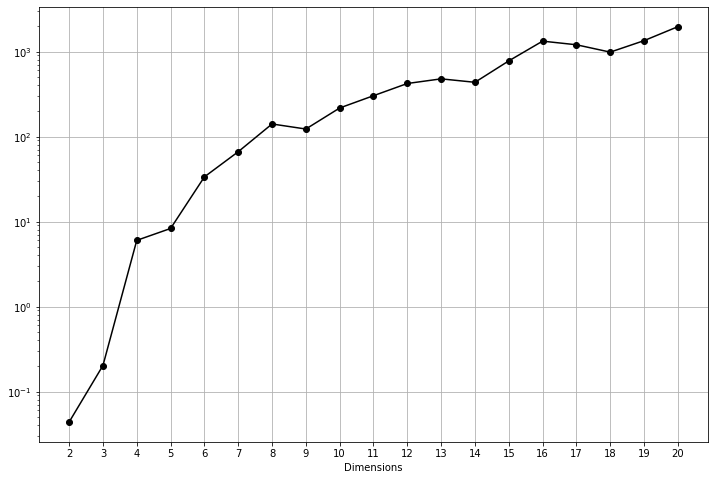

In [14]:
#
# En el caso anterior se evaluaron 2500 puntos. En este
# experimento se tomarn 10.000 puntos y se grafica el mejor
# punto encontrado contra la cantidad de dimensiones
#

# se fija la semilla del generador de aleatorios
rng = np.random.default_rng(12345678)

n_points = 50
X = np.linspace(start=fn.LB[0], stop=fn.UB[0], num=n_points)

best = []
for n_dim in range(2, 21):
    fn = Rosenbrock(n_dim)
    fn_min = 1e10
    for _ in range(10000):
        x = [X[i] for i in rng.integers(low=0, high=n_points, size=n_dim)]
        fn_min = min(fn_min, fn(x))
    best.append(0.00000001 + fn_min)
        
plt.figure(figsize=(12,8))
plt.plot(list(range(2, 21)), best, 'o-k')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(2, 21, 1))
plt.xlabel('Dimensions')
plt.show()

#
# La figura muestra como el valor del óptimo se degrada con
# la cantidad de dimensiones manteniendo la cantidad de 
# puntos evaluados fija
# 

## Experimento 2

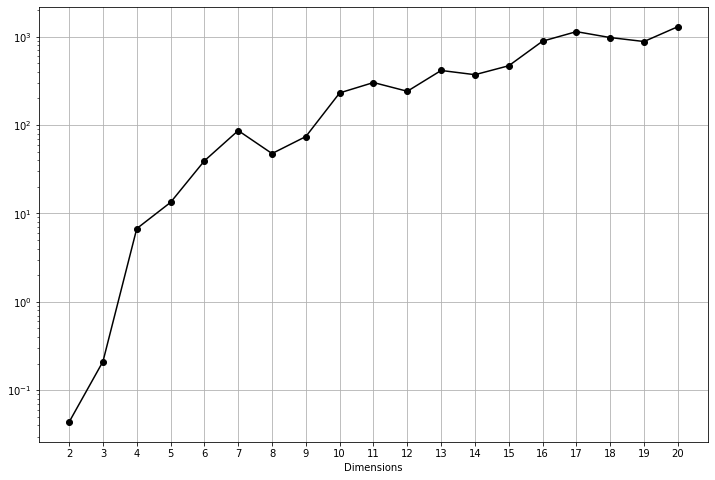

In [15]:
#
# En este experimento la cantidad de puntos evaluados será
# 1.000 * la cantidad de dimensiones del problema. Esto es,
# para 2 dimensiones se evaluarán 2.000 puntos, para 3 se 
# evaluarán 3.000 puntos y así sucesivamente
#

# se fija la semilla del generador de aleatorios
rng = np.random.default_rng(12345678)

n_points = 50
X = np.linspace(start=fn.LB[0], stop=fn.UB[0], num=n_points)

best = []
for n_dim in range(2, 21):
    fn = Rosenbrock(n_dim)
    fn_min = 1e10
    for _ in range(1000 * n_dim):
        x = [X[i] for i in rng.integers(low=0, high=n_points, size=n_dim)]
        fn_min = min(fn_min, fn(x))
    best.append(0.00000001 + fn_min)
        
plt.figure(figsize=(12,8))
plt.plot(list(range(2, 21)), best, 'o-k')
plt.yscale('log')
plt.grid()
plt.xticks(np.arange(2, 21, 1))
plt.xlabel('Dimensions')
plt.show()

#
# La figura muestra como el valor del óptimo se degrada con
# la cantidad de dimensiones manteniendo la cantidad de 
# puntos evaluados fija. Aunque la cantidad de puntos 
# evaluados aumenta con la cantidad de dimensiones, no se
# percibe una mejora, en comparación con la gráfica 
# anterior
# 